   # Tensorflow - Classification Problems
    
   * Binary Classifications
   * Multiclass Classifications
   * Multilabel Classifications

In [1]:
import tensorflow as tf

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import make_circles

2023-02-28 13:14:23.349231: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Working with Non-Linear Datasets

In [37]:
# creating data
n_samples = 1000
X, y = make_circles(n_samples,
                   noise=0.025,
                   random_state=42)

# check features and labels
X, y

# (array([[ 0.75424625,  0.23148074],
#         [-0.75615888,  0.15325888],
#         [-0.81539193,  0.17328203],
#         ...,
#         [-0.13690036, -0.81001183],
#         [ 0.67036156, -0.76750154],
#         [ 0.28105665,  0.96382443]]),
#  array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
#         0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
#         0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
#         1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
#         1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
#         1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
#         0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
#         1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
#         0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
#         1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
#         0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
#         1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
#         0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
#         0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
#         1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
#         1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
#         1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
#         0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
#         0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
#         1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
#         0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
#         1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
#         1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
#         1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
#         1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
#         0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
#         1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
#         1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
#         1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
#         0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
#         0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
#         1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
#         1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
#         0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
#         1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
#         1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
#         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
#         1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
#         1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
#         0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
#         0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
#         0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
#         0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
#         1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
#         0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
#         0, 1, 0, 1, 0, 0, 0, 1, 0, 0]))

(array([[ 0.75725609,  0.22767948],
        [-0.76169053,  0.14940069],
        [-0.81177524,  0.16111279],
        ...,
        [-0.13906781, -0.80598149],
        [ 0.67272582, -0.76107939],
        [ 0.28171709,  0.96294066]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
        0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
        0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
        1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
        1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
        0, 1, 1, 0, 1, 0, 1, 

In [38]:
# the dataset has two labels 1 & 0 for datapoints
# of the inner and outer circle generated by Scikit-Learn

circles = pd.DataFrame({"X0":X[:,0], "X1": X[:, 1], "label":y})
circles, X.shape, y.shape

# (           X0        X1  label
#  0    0.754246  0.231481      1
#  1   -0.756159  0.153259      1
#  2   -0.815392  0.173282      1
#  3   -0.393731  0.692883      1
#  4    0.442208 -0.896723      0
#  ..        ...       ...    ...
#  995  0.244054  0.944125      0
#  996 -0.978655 -0.272373      0
#  997 -0.136900 -0.810012      1
#  998  0.670362 -0.767502      0
#  999  0.281057  0.963824      0
 
#  [1000 rows x 3 columns],
#  (1000, 2),
#  (1000,))

(           X0        X1  label
 0    0.757256  0.227679      1
 1   -0.761691  0.149401      1
 2   -0.811775  0.161113      1
 3   -0.384880  0.698046      1
 4    0.441359 -0.897170      0
 ..        ...       ...    ...
 995  0.242795  0.948710      0
 996 -0.976976 -0.268426      0
 997 -0.139068 -0.805981      1
 998  0.672726 -0.761079      0
 999  0.281717  0.962941      0
 
 [1000 rows x 3 columns],
 (1000, 2),
 (1000,))

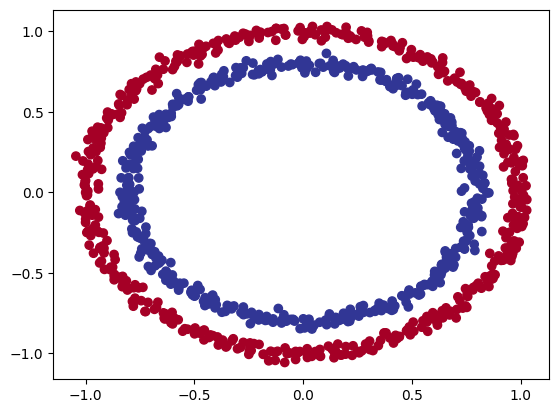

In [39]:
# we can visualize them in a scatter plot
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

![Tensorflow - Classification Problems](../assets/02_Tensorflow_Classifications_01.png)

## Building the Model

We can now build a neural network that allows us to do a binary classification between datapoints that belong to the blue and red circle.

In [40]:
tf.random.set_seed(42)

model_circles = tf.keras.Sequential([
    tf.keras.layers.Dense(1, name="input_layer")
], name="model_circles")

model_circles.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=["accuracy"])

# earlystop_callback = tf.keras.callbacks.EarlyStopping(
#   monitor='val_loss', min_delta=0.00001,
#   patience=100, restore_best_weights=True)

model_circles.fit(X, y, epochs=10) # callbacks=[earlystop_callback]
model_circles.evaluate(X, y)

# 32/32 [==============================] - 0s 1ms/step - loss: 0.7405 - accuracy: 0.5050
# [0.7405271530151367, 0.5049999952316284
#
# currently the model only predicts with a 45% accuracy... worse than pure guessing with a binary choice

Epoch 1/10
32/32 [==============================] - 0s 2ms/step - loss: 6.0180 - accuracy: 0.4870
Epoch 2/10
32/32 [==============================] - 0s 2ms/step - loss: 5.7225 - accuracy: 0.4880
Epoch 3/10
32/32 [==============================] - 0s 2ms/step - loss: 4.8668 - accuracy: 0.4770
Epoch 4/10
32/32 [==============================] - 0s 2ms/step - loss: 4.5345 - accuracy: 0.4670
Epoch 5/10
32/32 [==============================] - 0s 2ms/step - loss: 4.2597 - accuracy: 0.4730
Epoch 6/10
32/32 [==============================] - 0s 2ms/step - loss: 3.9166 - accuracy: 0.4800
Epoch 7/10
32/32 [==============================] - 0s 2ms/step - loss: 3.7446 - accuracy: 0.4740
Epoch 8/10
32/32 [==============================] - 0s 2ms/step - loss: 3.5293 - accuracy: 0.4770
Epoch 9/10
32/32 [==============================] - 0s 2ms/step - loss: 2.6574 - accuracy: 0.4780
Epoch 10/10
32/32 [==============================] - 0s 1ms/step - loss: 0.7830 - accuracy: 0.4950


[0.7829642295837402, 0.4950000047683716]

In [42]:
tf.random.set_seed(42)

# adding complexity + activation functions
model_circles_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(8, name="input_layer"),
    tf.keras.layers.Dense(16, name="dense_layer1"),
    tf.keras.layers.Dense(8, name="dense_layer2"),
    tf.keras.layers.Dense(1, name="output_layer")
], name="model_circles_1")

# # adding complexity + activation functions
# model_circles_1 = tf.keras.Sequential([
#     tf.keras.layers.Dense(8, activation="relu", name="input_layer"),
#     tf.keras.layers.Dense(16, activation="relu", name="dense_layer1"),
#     tf.keras.layers.Dense(8, activation="relu", name="dense_layer2"),
#     tf.keras.layers.Dense(1, activation="relu", name="output_layer")
# ], name="model_circles_1")

model_circles_1.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"])

history_1 = model_circles_1.fit(X, y, epochs=150, verbose=0)
model_circles_1.evaluate(X, y)

# 32/32 [==============================] - 0s 1ms/step - loss: 0.7405 - accuracy: 0.5050
# [0.7405271530151367, 0.5049999952316284]

# not much better...

32/32 [==============================] - 0s 1ms/step - loss: 0.6932 - accuracy: 0.4740


[0.6931759119033813, 0.4740000069141388]

Text(0.5, 0, 'epochs')

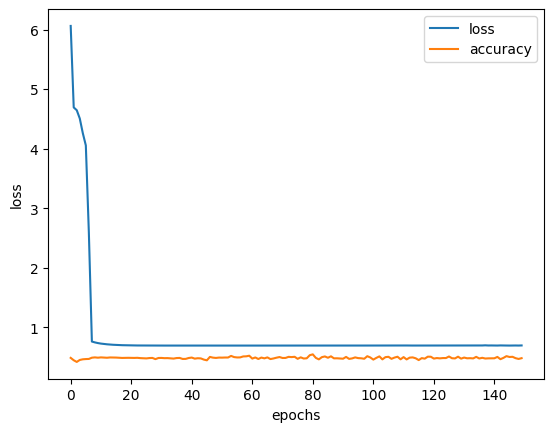

In [43]:
# history plot
pd.DataFrame(history_1.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

![Tensorflow - Classification Problems](../assets/02_Tensorflow_Classifications_02.png)

### Why it Fails

In [44]:
# visualize predictions
# https://cs231n.github.io/neural-networks-case-study/

def decision_boundray(model, X, y):
    
    # define axis boundries for features and labels
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    
    # create meshgrid within boundries (fresh data to run predictions on)
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                        np.linspace(y_min, y_max, 100))
    
    # stack both mesh arrays together
    x_in = np.c_[xx.ravel(), yy.ravel()]
    
    # make predictions using the trained model
    y_pred = model.predict(x_in)
    
    # check for multiclass-classification 
    if len(y_pred[0]) > 1:
        # reshape predictions
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        y_pred = np.round(y_pred).reshape(xx.shape)
        
    # plot decision boundry
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 0s 828us/step


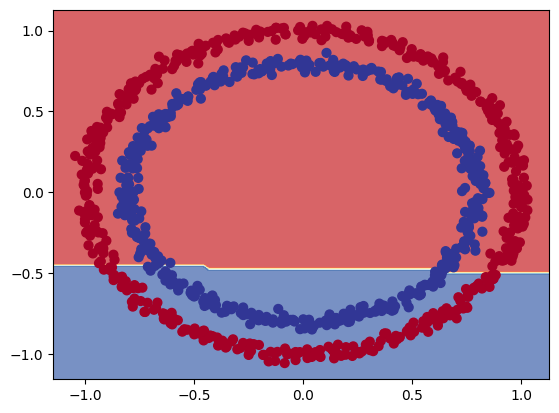

In [45]:
decision_boundray(model=model_circles_1, X=X, y=y)
# the model is trying to draw a straight line through the dataset to differentiate between both classes
# it then expands this line and tries to divide both classes - and fails with a circular dataset.

![Tensorflow - Classification Problems](../assets/02_Tensorflow_Classifications_03.png)

## Non Linearity

> Experimenting with the [Tensorflow Playground](https://playground.tensorflow.org/#activation=linear&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.001&regularizationRate=0&noise=0&networkShape=1&seed=0.14938&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false) to find a model that works for the non-linear classification problem.

A model useable for linear problems will remain stuck at an accuracy around 50% - purely guessing when predicting:

![Tensorflow - Classification Problems](../assets/02_Tensorflow_Classifications_04.png)

In [47]:
# rebuilding the model (above)
tf.random.set_seed(42)

model_circles_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation="linear", name="input_layer")
])

model_circles_2.compile(loss="binary_crossentropy",
                       optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                       metrics=["accuracy"])

history_2 = model_circles_2.fit(X, y, epochs=150, verbose=0)
model_circles_2.evaluate(X, y)

# 32/32 [==============================] - 0s 1ms/step - loss: 0.7222 - accuracy: 0.4590
# [0.7222346067428589, 0.45899999141693115]

32/32 [==============================] - 0s 1ms/step - loss: 0.7222 - accuracy: 0.4590


[0.7222346067428589, 0.45899999141693115]

313/313 [==============================] - 0s 774us/step


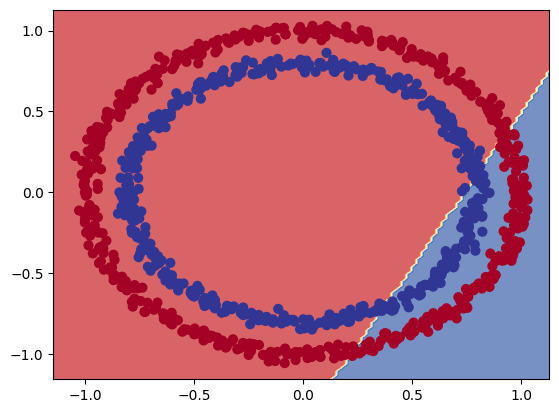

In [48]:
decision_boundray(model=model_circles_2, X=X, y=y)

![Tensorflow - Classification Problems](../assets/02_Tensorflow_Classifications_05.png)

I am starting to get a good separation with the following setup after approx. 2000 epochs:


![Tensorflow - Classification Problems](../assets/02_Tensorflow_Classifications_06.png)

In [52]:
# rebuilding the model (above)
tf.random.set_seed(42)

model_circles_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu")
])

model_circles_3.compile(loss="binary_crossentropy",
                       optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                       metrics=["accuracy"])

history_3 = model_circles_3.fit(X, y, epochs=2000, verbose=0)
model_circles_3.evaluate(X, y)

# 32/32 [==============================] - 0s 1ms/step - loss: 0.6932 - accuracy: 0.5000
# [0.693161129951477, 0.5]

32/32 [==============================] - 0s 1ms/step - loss: 0.6932 - accuracy: 0.5000


[0.6931561231613159, 0.5]

313/313 [==============================] - 0s 843us/step


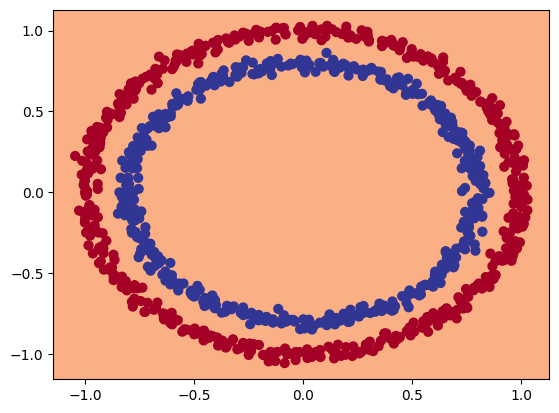

In [51]:
decision_boundray(model=model_circles_3, X=X, y=y)
# well, that isn't good...

In [55]:
# rebuilding the model (2nd attempt)
# adding an output layer with a single neuron for the binary classification

tf.random.set_seed(42)

model_circles_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu", name="input_layer"),
    tf.keras.layers.Dense(1, name="output_layer")
])

model_circles_4.compile(loss="binary_crossentropy",
                       optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                       metrics=["accuracy"])

history_4 = model_circles_4.fit(X, y, epochs=2000, verbose=0)
model_circles_4.evaluate(X, y)

# 32/32 [==============================] - 0s 2ms/step - loss: 0.3404 - accuracy: 0.8320
# [0.34036046266555786, 0.8320000171661377]

32/32 [==============================] - 0s 2ms/step - loss: 0.3404 - accuracy: 0.8320


[0.34036046266555786, 0.8320000171661377]

313/313 [==============================] - 0s 821us/step


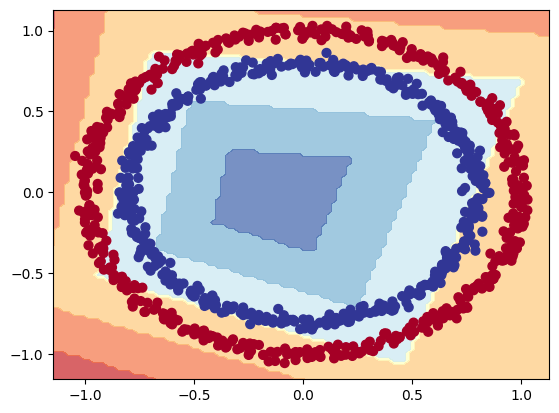

In [56]:
decision_boundray(model=model_circles_4, X=X, y=y)
# much better - but not as good as the example from the tf.playground

In [62]:
# rebuilding the model (2nd attempt)
# adding an "sigmoid" activation for the output layer

tf.random.set_seed(42)

model_circles_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu", name="input_layer"),
    tf.keras.layers.Dense(1, activation="sigmoid", name="output_layer")
])

model_circles_6.compile(loss="binary_crossentropy",
                       optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                       metrics=["accuracy"])

model_circles_6.fit(X, y, epochs=2000, verbose=0)
model_circles_6.evaluate(X, y)
32/32 [==============================] - 0s 1ms/step - loss: 0.0241 - accuracy: 1.0000
[0.0241051334887743, 1.0]

32/32 [==============================] - 0s 1ms/step - loss: 0.0241 - accuracy: 1.0000


[0.0241051334887743, 1.0]

313/313 [==============================] - 0s 779us/step


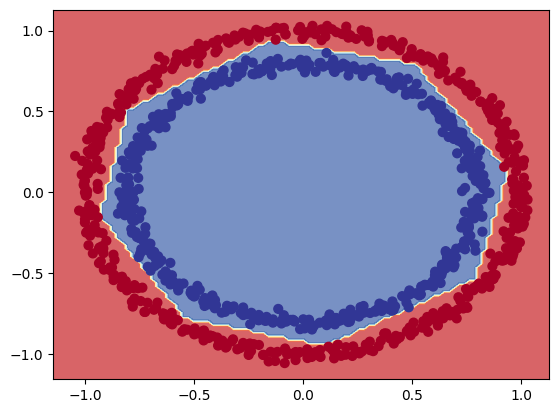

In [63]:
decision_boundray(model=model_circles_6, X=X, y=y)
# there you go...

## Non-linear Activation Functions

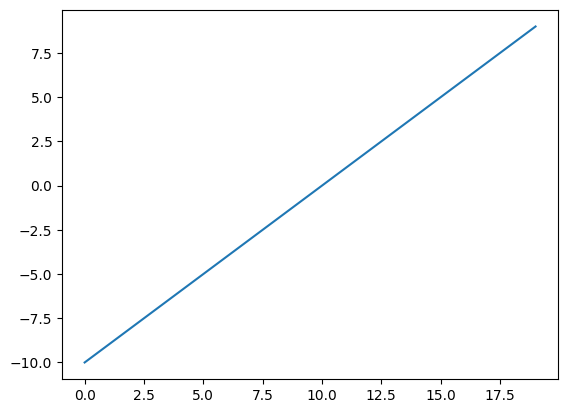

In [64]:
# create a input tensor
input_linear = tf.cast(tf.range(-10, 10), tf.float32)

# visualize the tensor
plt.plot(input_linear)

![Tensorflow - Classification Problems](../assets/02_Tensorflow_Classifications_07.png)

### Linear Activation Function

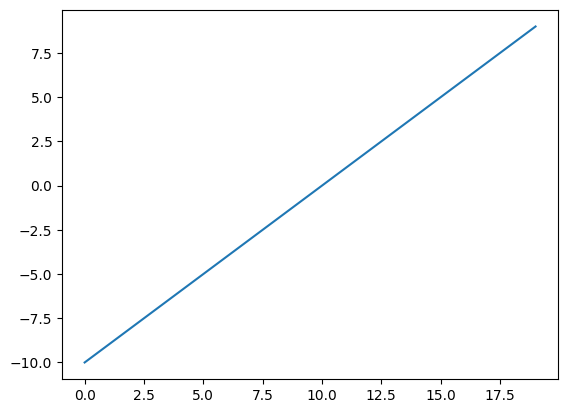

In [77]:
# replicating the linear activation function linear(x) = x
def linear(X):
    return X

linear(input_linear)

# <tf.Tensor: shape=(20,), dtype=float32, numpy=
# array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
#          1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
#       dtype=float32)>

plt.plot(linear(input_linear))

![Tensorflow - Classification Problems](../assets/02_Tensorflow_Classifications_08.png)

### Sigmoid Activation Function

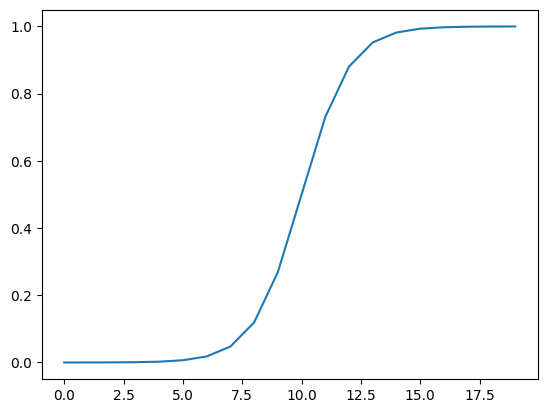

In [68]:
# replicating the sigmoid activation function sigmoid(x) = 1 / (1 + exp(-x))
def sigmoid(X):
    return 1/(1 + tf.exp(-X))

sigmoid(input_linear)

# <tf.Tensor: shape=(20,), dtype=float32, numpy=
# array([4.5397868e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
#        2.4726230e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
#        1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105854e-01,
#        8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
#        9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
#       dtype=float32)>

plt.plot(sigmoid(input_linear))

![Tensorflow - Classification Problems](../assets/02_Tensorflow_Classifications_09.png)

### reLU Activation Function

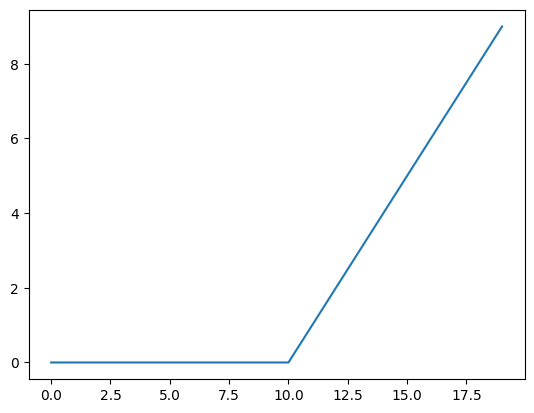

In [71]:
# replicating the reLU function f(x) = 0 for x<0 and x for x>0
def relu(X):
    return tf.maximum(0, X)

relu(input_linear)
# <tf.Tensor: shape=(20,), dtype=float32, numpy=
# array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
#        7., 8., 9.], dtype=float32)>

plt.plot(relu(input_linear))

![Tensorflow - Classification Problems](../assets/02_Tensorflow_Classifications_10.png)